In [2]:
# Data cleaning for water surface temperature dataset
# Location: Scripps Pier, La Jolla Shores, San Diego, CA

In [3]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import csv

In [4]:
# Creating path for water surface temperature of La Jolla
SURF_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/water_surface_temp.csv")

def load_surftemp_data(surf_path=SURF_PATH):
    temp_path = os.path.join(surf_path)
    return pd.read_csv(temp_path)

surf_pd = load_surftemp_data()
surf_pd.head()

,YEAR,MONTH,DAY,TIME_PST,TIME_FLAG,SURF_TEMP_C,SURF_FLAG,BOT_TEMP_C,BOT_FLAG,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1916.0,8.0,22.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1916.0,8.0,23.0,NaN,NaN,19.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1916.0,8.0,24.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1916.0,8.0,25.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1916.0,8.0,26.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Removing columns not needed from Surface Temperature dataframe
surf_temp_pd = surf_pd.drop(['TIME_FLAG', 'SURF_FLAG', 'BOT_FLAG', 'Unnamed: 9',
                            'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                             'Unnamed: 13'], axis=1)
surf_temp_pd.head()

,YEAR,MONTH,DAY,TIME_PST,SURF_TEMP_C,BOT_TEMP_C
0,1916.0,8.0,22.0,NaN,19.5,NaN
1,1916.0,8.0,23.0,NaN,19.9,NaN
2,1916.0,8.0,24.0,NaN,19.7,NaN
3,1916.0,8.0,25.0,NaN,19.7,NaN
4,1916.0,8.0,26.0,NaN,19.5,NaN


In [6]:
# Removing all rows of column 'SURF_TEMP_C' with values 'NaN'
surf_temp_drop = surf_temp_pd.dropna(subset = ['SURF_TEMP_C'])
surf_temp_clean = surf_temp_drop.rename(columns={'YEAR':'Year', 'MONTH':'Month', 
                                                 'DAY':'Day', 'TIME_PST':'Time (PST)',
                                                 'SURF_TEMP_C':'Surface Temperature',
                                                 'BOT_TEMP_C':'Sea Floor Temperature'})
surf_temp_clean.head()

,Year,Month,Day,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,8.0,22.0,NaN,19.5,NaN
1,1916.0,8.0,23.0,NaN,19.9,NaN
2,1916.0,8.0,24.0,NaN,19.7,NaN
3,1916.0,8.0,25.0,NaN,19.7,NaN
4,1916.0,8.0,26.0,NaN,19.5,NaN


In [7]:
# Mean of each year
surf_temp_mean = surf_temp_clean.groupby('Year').mean().reset_index()
surf_temp_mean.head()

,Year,Month,Day,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,10.281818,16.600000,NaN,15.641818,NaN
1,1917.0,6.549669,15.844371,NaN,16.742715,NaN
2,1918.0,6.524272,15.741100,NaN,17.385113,NaN
3,1919.0,6.611650,15.731392,NaN,16.810032,NaN
4,1920.0,6.498615,15.747922,NaN,16.576177,NaN


In [8]:
# 'DAY' and 'MONTH' column no longer necessary and therefore removing
surf_temp_df = surf_temp_mean.drop(['Month', 'Day'], axis=1)
surf_temp_df.head()

,Year,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,NaN,15.641818,NaN
1,1917.0,NaN,16.742715,NaN
2,1918.0,NaN,17.385113,NaN
3,1919.0,NaN,16.810032,NaN
4,1920.0,NaN,16.576177,NaN


In [9]:
surf_temp_df.describe()

,Year,Time (PST),Surface Temperature,Sea Floor Temperature
count,104.000000,30.000000,104.000000,94.000000
mean,1967.500000,1074.122179,17.233217,16.725374
std,30.166206,72.478644,0.802877,0.848021
min,1916.000000,931.217647,15.546027,14.709749
25%,1941.750000,1019.456594,16.629663,16.104036
50%,1967.500000,1084.321429,17.045890,16.636732
75%,1993.250000,1112.850999,17.683491,17.230892
max,2019.000000,1223.152824,19.585294,19.031449


In [10]:
# Minimum mean surface and sea floor temperature
surf_min = surf_temp_df["Surface Temperature"].min()
floor_min = surf_temp_df["Sea Floor Temperature"].min()
# Maximum mean surface temperature
surf_max = surf_temp_df["Surface Temperature"].max()
floor_max = surf_temp_df["Sea Floor Temperature"].max()
# Summary Dataframe for the mean Maximum and Minimum Temperatures of Scripps Pier
temp_summary = pd.DataFrame({
    'Temperature': ["Surface", "Sea Floor"],
    'Minimum': [surf_min, floor_min],
    'Maximum': [surf_max, floor_max]
})
temp_summary

,Temperature,Minimum,Maximum
0,Surface,15.546027,19.585294
1,Sea Floor,14.709749,19.031449


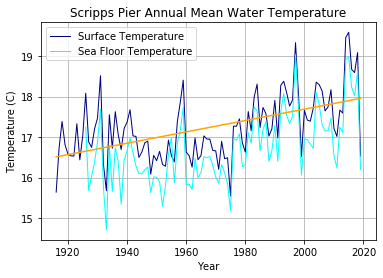

In [11]:
# Line graph of the mean Surface and Bottom Temperature over time
x_axis = surf_temp_df['Year']
surface_y = surf_temp_df['Surface Temperature']
bottom_y = surf_temp_df['Sea Floor Temperature']
surf_temp, = plt.plot(x_axis, surface_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")
bottom_temp, = plt.plot(x_axis, bottom_y, linewidth=1, color='cyan', 
                        label="Sea Floor Temperature")
# adds a legend and sets location on upper righthand corner
plt.legend(loc = "upper left")
plt.title("Scripps Pier Annual Mean Water Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
# adding trendline 
z = np.polyfit(x_axis, surface_y, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"orange")
plt.grid()
# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/scripps_water_temp.png")
plt.show()

In [12]:
# Importing CO2 data

CO2_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/water_surface_temp.csv")

def load_carbondioxide_data(co2_path=CO2_PATH):
    carbon_path = os.path.join(co2_path)
    return pd.read_csv(carbon_path)

carbon_pd = load_carbondioxide_data()
carbon_pd.head()